# Heatwave Risk Assessment

**Purpose:** This notebook assesses the daily heatwave risk based on forecasted temperatures and urban vulnerability characteristics. It visually highlights both the temperature severity and contextual vulnerability of the city.

**City:** Rome  
**Data Sources:**  
- Forecast: Open-Meteo ECMWF (IFS 0.25° resolution)  
- Urban Vulnerability: Manually compiled from publicly available city statistics


✅ All expected columns are present!


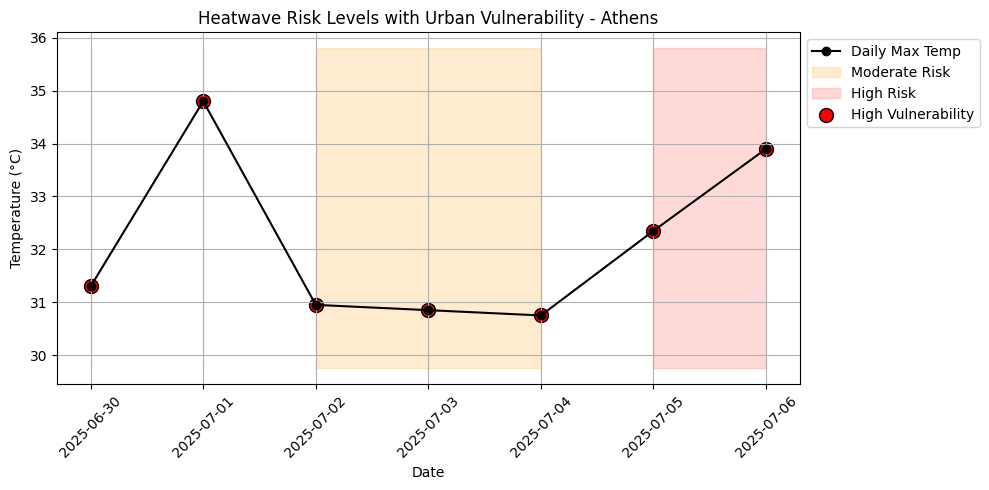

In [39]:
from pathlib import Path
import pandas as pd

city_name = "athens"
input_path = Path("../data/processed/") / f"{city_name}_heatwave_risk.csv"
df = pd.read_csv(input_path)

# Check if expected columns are present
expected_cols = {"date", "temperature", "city", "is_hot", "risk_level", "high_vulnerability"}
missing_cols = expected_cols - set(df.columns)

if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")
else:
    print("✅ All expected columns are present!")

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define risk color map
risk_colors = {
    "None": "#d0f0c0",       # light green
    "Mild": "#fffac8",       # light yellow
    "Moderate": "#ffb347",   # orange
    "High": "#ff6961",       # red
    "Extreme": "#8b0000"     # dark red
}

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["temperature"], label="Daily Max Temp", color="black", marker="o")

# Fill background by risk level
for level in df["risk_level"].unique():
    mask = df["risk_level"] == level
    plt.fill_between(df["date"], df["temperature"].min() - 1, df["temperature"].max() + 1,
                     where=mask, color=risk_colors[level], alpha=0.25, label=f"{level} Risk")

# Highlight high vulnerability
for idx, row in df.iterrows():
    if row["high_vulnerability"]:
        plt.scatter(row["date"], row["temperature"], color="red", s=100, edgecolor="black", label="High Vulnerability" if idx == 0 else "")

plt.title(f"Heatwave Risk Levels with Urban Vulnerability - {city_name.title()}")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
#plt.savefig(f"outputs/{city_name}_risk_visualization.png", dpi=300)
plt.show()
